In [1]:
import pandas as pd
import numpy as np
import pycaret

In [2]:
df = pd.read_csv("C:\\Users\\Navneeth\\Documents\\My_Things\\Projects\\medical_cost_insur\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
from pycaret.regression import *
r1 = setup(df,target = 'charges')
#r2 = setup

,Description,Value
0,session_id,7186
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [5]:
r2 = setup(df, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [6]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3143.6377,21783764.0000,4667.3081,0.8699,0.4157,0.3397
1,3388.1045,31514276.0000,5613.7578,0.8168,0.4423,0.3203
2,3045.2490,23860854.0000,4884.7573,0.6979,0.5334,0.3962
3,3139.4819,20975828.0000,4579.9375,0.8249,0.6489,0.4553
4,3428.3003,29258012.0000,5409.0674,0.7824,0.4685,0.3314
5,3212.1692,26104566.0000,5109.2627,0.8321,0.4113,0.3028
6,3034.8381,27061388.0000,5202.0562,0.8159,0.3882,0.3128
7,3545.0991,30867566.0000,5555.8589,0.8303,0.6943,0.3246
8,3247.6345,23298060.0000,4826.8066,0.8495,0.4130,0.3664
9,3371.0481,30088440.0000,5485.2930,0.8062,0.5286,0.3757


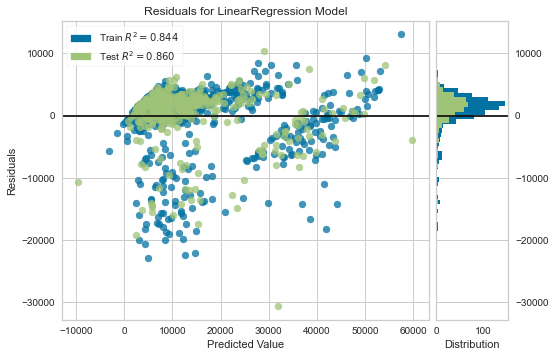

In [7]:
plot_model(lr, plot='residuals')

In [8]:
save_model(lr, model_name = 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='charges'

In [9]:
x = np.array([19,'female',27.900,'0','yes','southeast'])
x

array(['19', 'female', '27.9', '0', 'yes', 'southeast'], dtype='<U11')

In [10]:
data = pd.DataFrame([x],columns = ['age','sex','bmi','children','smoker','region'])
data

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southeast


In [11]:
model = load_model('pycaret_model')
predict_model(model,data=data,round=0)

Transformation Pipeline and Model Successfully Loaded


,age,sex,bmi,children,smoker,region,Label
0,19,female,27.9,0,yes,southeast,21015.0
